In [9]:
# 라이브러리 설치
!pip install fer mtcnn torch==2.0.1+cu118 torchvision==0.15.2+cu118 transformers==4.30.0 --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118


In [10]:
# 웹캠으로 사진 찍기
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
from io import BytesIO

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Click to take a photo';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [13]:
filename = take_photo()
print('📁 사진 저장 완료:', filename)

<IPython.core.display.Javascript object>

📁 사진 저장 완료: photo.jpg


😊 감정 분석 결과: happy (0.98)


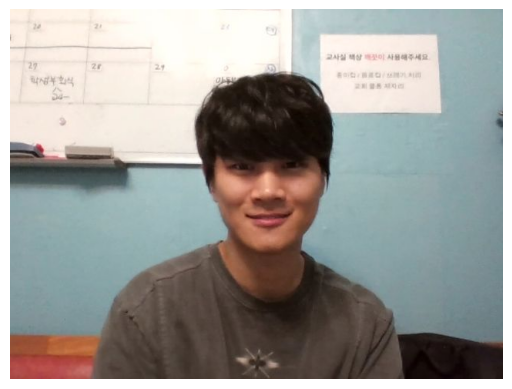

In [14]:
# 감정 인식
import numpy as np
import matplotlib.pyplot as plt
from fer import FER

# 이미지 로드
img = Image.open(filename)
img_array = np.array(img)

# 감정 분석기 초기화
detector = FER(mtcnn=True)
result = detector.detect_emotions(img_array)

# 결과 출력
plt.imshow(img)
plt.axis('off')

if result:
    emotions = result[0]['emotions']
    top_emotion = max(emotions, key=emotions.get)
    confidence = emotions[top_emotion]
    print(f"😊 감정 분석 결과: {top_emotion} ({confidence:.2f})")
else:
    print("❗ 얼굴을 감지하지 못했습니다.")

## 감정 인식 프로젝트

이 프로젝트는 웹캠을 통해 촬영된 이미지에서 사람의 감정을 인식하는 간단한 애플리케이션입니다. `fer` 라이브러리를 활용하여 얼굴을 감지하고, 다양한 감정(행복, 슬픔, 중립 등)을 분석합니다.

**핵심 코드 및 로직:**

1.  **라이브러리 설치:**
    `fer`, `mtcnn`, `torch`, `torchvision`, `transformers` 라이브러리를 설치하여 감정 인식 및 얼굴 감지에 필요한 도구를 준비합니다.

2.  **웹캠 사진 촬영:**
    Google Colab의 기능을 활용하여 웹캠으로 사용자의 사진을 촬영하고 `photo.jpg` 파일로 저장합니다. 이 과정은 JavaScript 코드를 포함하는 파이썬 함수 `take_photo`를 통해 이루어집니다.

In [ ]:
    from fer import FER
    import numpy as np
    from PIL import Image

    # 이미지 로드
    img = Image.open(filename)
    img_array = np.array(img)

    # 감정 분석기 초기화 및 감정 감지
    detector = FER(mtcnn=True)
    result = detector.detect_emotions(img_array)

    if result:
        emotions = result[0]['emotions']
        top_emotion = max(emotions, key=emotions.get)
        confidence = emotions[top_emotion]
        print(f"😊 감정 분석 결과: {top_emotion} ({confidence:.2f})")
    else:
        print("❗ 얼굴을 감지하지 못했습니다.")